In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.5.0

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.9 MB/s eta 0:00:00


## 1. Load Data, EDA, Preprocess, Data Split


### 1.1 Load Data

In [ ]:
import numpy as np
import pandas as pd
import io
import os
from google.colab import files

# Read file
if os.path.exists('Twitter_Full.csv'):
  df = pd.read_csv('Twitter_Full.csv', sep=";")
else:
  print("File 'Twitter_Full.csv' not found. Please upload the file.")
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['Twitter_Full.csv']), sep=";")

File 'Twitter_Full.csv' not found. Please upload the file.


Saving Twitter_Full.csv to Twitter_Full.csv


### 1.2 Display basic dataset info

In [ ]:
# First 5 records of the dataset
print(f'First 5 records of the dataset:\n{df.head()}')

First 5 records of the dataset:
                                                text  \
0  Being s mom is cleaning 24/7 the same shit ove...   
1  And now we have been given the walkthru book b...   
2  Wishing YOU Peace Joy & Love! JoyTrain MentalH...   
3   speak-no-evil monkey Can I Be Honest With You...   
4  Psy Do u hv any regrets? Me No Psy Are you hap...   

                                            hashtags  labels  Unnamed: 3  \
0                       ['momlife', 'kids', 'tired']       1         NaN   
1                                       ['walkthru']       0         NaN   
2  ['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...       0         NaN   
3  ['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...       1         NaN   
4                                                 []       0         NaN   

   Unnamed: 4  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
# Basic dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8900 entries, 0 to 8899
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        8897 non-null   object 
 1   hashtags    8892 non-null   object 
 2   labels      8900 non-null   int64  
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 347.8+ KB
None


In [ ]:
# Dataset Shape
print(f'Dataset instances: {df.shape[0]}\nDataset columns: {df.shape[1]}')

Dataset instances: 8900
Dataset columns: 5


### 1.3 Early preprocess

In [ ]:
# Drop unwanted columns
df.drop(columns=['Unnamed: 3','Unnamed: 4', 'hashtags'], inplace=True)

# First 5 records after columns removal
print(f'First 5 records after columns removal:\n{df.head()}')

First 5 records after columns removal:
                                                text  labels
0  Being s mom is cleaning 24/7 the same shit ove...       1
1  And now we have been given the walkthru book b...       0
2  Wishing YOU Peace Joy & Love! JoyTrain MentalH...       0
3   speak-no-evil monkey Can I Be Honest With You...       1
4  Psy Do u hv any regrets? Me No Psy Are you hap...       0


In [ ]:
# Remove NAs
print(f'Count of NAs per column:\n{df.isna().sum()}\n')
df.dropna(inplace=True)

# Remove dublicates
duplicates_count = df['text'].duplicated().sum()
print(f"Number of duplicates in 'text' column: {duplicates_count}\n")
df.drop_duplicates(subset='text', keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)

print(f"Number of instances after removing duplicates and dropping NAs: {df.shape[0]}")

Count of NAs per column:
text      3
labels    0
dtype: int64

Number of duplicates in 'text' column: 461

Number of instances after removing duplicates and dropping NAs: 8436


### 1.4 EDA and Data Visualization

In [ ]:
# Count of instances per label
labels_count = df['labels'].value_counts()
print(f'Count of instances per label:\n{labels_count}')

Count of instances per label:
labels
1    4307
0    4129
Name: count, dtype: int64


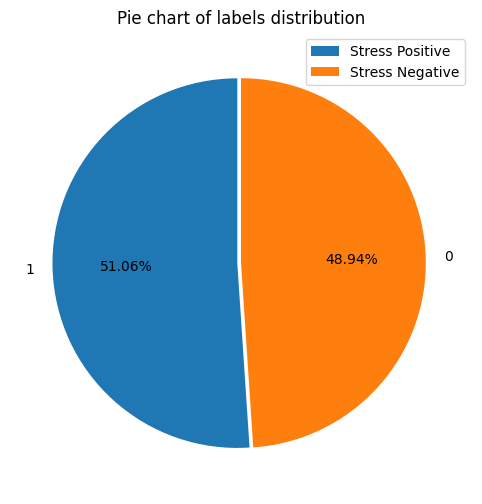

In [ ]:
import matplotlib.pyplot as plt

# Pie chart of labels distribution
plt.figure(figsize=(10,6))
plt.pie(labels_count, labels= labels_count.index, autopct='%1.2f%%', startangle=90, explode=[0.02, 0])
plt.title("Pie chart of labels distribution")
plt.legend(["Stress Positive", "Stress Negative"])
plt.show()

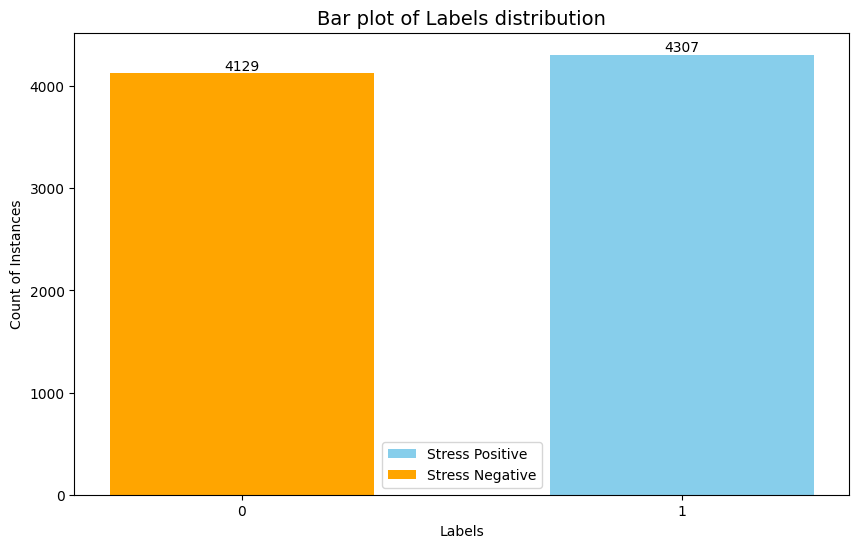

In [ ]:
# Barplot of labels distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(labels_count.index, labels_count.values, width= 0.6, color=['skyblue', 'orange'], label=["Stress Positive", "Stress Negative"])
for bar in bars:
    plt.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height(),
          str(bar.get_height()),
          ha='center',
          va='bottom'
        )
plt.title('Bar plot of Labels distribution', fontsize=14)
plt.xlabel('Labels')
plt.ylabel('Count of Instances')
plt.xticks(labels_count.index)
plt.legend(loc='best')
plt.show()

In [1]:
import random
# Sample test for texts with noise

# Retain all records that contain non-alphanumeric text
pattern = r'[^\w\s]'
contains_non_alpha = df['text'].str.contains(pattern, na=False)

if contains_non_alpha.any():
  # Count of non-alpha text
  print(f'Count of instances containing non-alphanumeric text:\n{contains_non_alpha.value_counts()}\n')

  # Random sample of non-alpha text
  non_alpha = df[contains_non_alpha].index.to_list()
  sample = df['text'].iloc[random.choice(non_alpha)]
  print(f'Sample instance containing non-alphanumeric characters:\n{sample}')
else:
  print(f'No instances containing non-alphanumeric text.')

NameError: name 'df' is not defined

In [ ]:
# Retain text that contains http(s) or com or www
pattern = r'https?|\bcom\b|\bwww\b' # http(s) or com or www
contains_https = df['text'].str.contains(pattern, na=False)

if contains_https.any():
  # Count of text contain url prefix/suffix
  print(f'Distribution of instances based on whether they contain http(s) text:\n{contains_https.value_counts()}\n')

  # Random sample of text that contain url prefix/suffix
  https = df[contains_https].index.to_list()
  sample = df['text'].iloc[random.choice(https)]
  print(f'Sample instance containing "http(s)" or "www" or "com":\n{sample}')
else:
  print(f'No instances containing http(s) text.')

Distribution of instances based on whether they contain http(s) text:
text
False    8420
True       16
Name: count, dtype: int64

Sample instance containing "http(s)" or "www" or "com":
Wonderful contributions already received for MentalHealthMatters week 6th-10th Sept! Let's shine a light on someone's dark day, get your positive poems over to theorganicpoet.com. Supporting mentalhealth because mentalhealthmatters. poetrycommunity SUBMISSIONS OPEN!


### 1.5 Data cleaning (noise removal, lemmatization)

In [ ]:
# lemmatization
import nltk
import re
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem import  WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

def get_wordnet_pos(tag):
  if tag.startswith('J'):
      return wordnet.ADJ
  elif tag.startswith('V'):
      return wordnet.VERB
  elif tag.startswith('N'):
      return wordnet.NOUN
  elif tag.startswith('R'):
      return wordnet.ADV
  else:
      return wordnet.NOUN

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

# Custom slang and abbreviation dictionary
abbreviation_dict = {
    "r": "are",
    "They're": "they are",
    "I'm": "I am",
    "I'll": "I will",
    "I'd": "I would",
    "hv": "have",
    "walkthru": "walkthrough",
    "u": "you",
    "ur": "your",
    "pls": "please",
    "thx": "thanks",
    "abt": "about",
    "b4": "before",
    "btw": "by the way",
    "cya": "see you",
    "dm": "direct message",
    "ez": "easy",
    "fyi": "for your information",
    "gr8": "great",
    "idk": "I don't know",
    "ikr": "I know right",
    "imho": "in my humble opinion",
    "imo": "in my opinion",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "np": "no problem",
    "omg": "oh my god",
    "plz": "please",
    "ppl": "people",
    "r": "are",
    "smh": "shaking my head",
    "sry": "sorry",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "w/": "with",
    "w/o": "without",
    "wanna": "want to",
    "gonna": "going to",
    "tho": "though",
    "thru": "through",
    "txt": "text",
    "yolo": "you only live once",
    "wut": "what",
    "bday": "birthday",
    "msg": "message",
    "nvm": "never mind",
    "omw": "on my way",
    "bc": "because",
    "ikr": "I know right",
    "tldr": "too long didn't read",
    "tho": "though",
    "ty": "thank you",
    "yw": "you're welcome",
    "xoxo": "hugs and kisses",
    "afaik": "as far as I know",
    "brb": "be right back",
    "gg": "good game",
    "rofl": "rolling on the floor laughing",
    "wtf": "what the heck",
    "ftw": "for the win",
    "hbu": "how about you",
    "ily": "I love you",
    "ly": "love you",
    "idc": "I don't care",
    "tysm": "thank you so much"
}

def expand_abbreviations(text, abbreviation_dict):
    words = text.split()
    expanded_words = [abbreviation_dict.get(word, word) for word in words]
    return ' '.join(expanded_words)

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        text = re.sub(r'https?\S+', '', text)
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Expand abbreviations
        text = expand_abbreviations(text, abbreviation_dict)

        # Remove stopwords and perform lemmatization

        # Split text to tokens
        words = word_tokenize(text)
        # Attach part of speech tags
        pos_tags = pos_tag(words)
        # Lemmatization
        lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words]
        lemmatized_text = ' '.join(lemmatized_words)
        return lemmatized_text
    else:
        return ""  # Return empty string for non-string inputs

# Create a copy of original df
df_clean = df.copy(deep=True)
# Apply lemmatization in every row of df_clean
df_clean['text'] = df_clean['text'].apply(clean_text)
print(df_clean.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                                text  labels
0  mom clean 247 shit end result everything mess ...       1
1  give walkthrough book base whole school pd gri...       0
2  wish peace joy love joytrain mentalhealth quot...       0
3  speaknoevil monkey honest globe show europeafr...       1
4  psy regret psy happy yes feel relieve goodbye ...       0


In [ ]:
# Random index selection
rand = random.choice(df.index)

# Compare original and lemmatized texts
sample_df = df['text'].iloc[rand]
sample_df_clean = df_clean['text'].iloc[rand]
print(f'Sample original text:\n{sample_df}\n')
print(f'Sample text after text cleaning:\n{sample_df_clean}')

Sample original text:
Dissolve the blocks on your path of abundance." - Dr. Laurie Weiss Are you feeling anxiety because you're bored by what you used to like? This ebook will help manage Covid stress. via 

Sample text after text cleaning:
dissolve block path abundance dr laurie weiss feeling anxiety youre bore use like ebook help manage covid stress via


### 1.6 Dataset split train (70%) - test (30%)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train-test (70% - 30%)
x = np.array(df_clean['text'])
y = np.array(df_clean['labels'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Number of instances in training set: {X_train.shape[0]}")
print(f"Number of instances in training set: {X_test.shape[0]}")

Number of instances in training set: 5905
Number of instances in training set: 2531


## 2. Word2Vec Models

### 2.0 tokenization

In [ ]:
tokenized_corpus = [text.split() for text in X_train]

### 2.1 1st Word2Vec Model

#### 2.1.1 1st. Word2vec Model Train into Dataset

In [ ]:
from gensim.models import Word2Vec
# Train a Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus, # Tokenized input
    vector_size=300,            # Dimensionality of the word vectors
    window=5,                   # Context window size
    min_count=1,                # Minimum word frequency
    workers=4,                  # Number of worker threads
    sg=0,                       # Skip-gram (1) or CBOW (0)
    epochs=25
)

# Save the model
model.save("word2vec_twitter_model.model")

In [ ]:
#Example of Similarity function of the word2vec_twitter_model
model = Word2Vec.load("word2vec_twitter_model.model")

word = "happy"
if word in model.wv:
    #Find most similar words
    similar_words = model.wv.most_similar(word, topn=5)
    print(f"Most similar words of '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity:.4f}")

    # Find the vector for a word
    print(f"Vector for '{word}':")
    print(model.wv[word])
else:
    print(f"'{word}' not in vocabulary.")

Most similar words of 'happy':
beautiful: 0.8779
relationshipgoal: 0.8738
girl: 0.8631
sun: 0.8536
flower: 0.8507
Vector for 'happy':
[ 5.43993056e-01  3.29131722e-01 -3.29833239e-01  5.60603678e-01
 -1.04029381e+00 -8.33274245e-01  2.85062939e-01  8.81676614e-01
 -3.93972307e-01 -1.52952164e-01 -2.06422463e-01 -5.09933233e-01
  7.07762301e-01  6.73777044e-01 -7.77188003e-01  1.34486079e-01
  4.92671132e-01  6.99735463e-01  1.92654788e-01 -2.01275364e-01
 -7.72500813e-01 -4.71889645e-01  1.33591861e-01  2.68973172e-01
 -3.11065512e-03  6.43552244e-01  5.68266153e-01  5.70186004e-02
 -2.65043229e-01 -1.25447714e+00  1.29774022e+00 -8.11350793e-02
  5.80124319e-01 -2.34176517e-01 -7.85472333e-01  6.73251867e-01
 -2.47389704e-01 -1.42576441e-01 -3.55259478e-01 -1.00921321e+00
  4.34422940e-01  1.56829774e-01 -7.23003298e-02  2.05008492e-01
  3.37952524e-01  9.51323330e-01 -1.52301267e-01  1.58108342e-02
 -7.12543070e-01  2.74264783e-01 -6.19854629e-01  9.49433073e-02
 -5.72982848e-01  7.3

#### 2.1.2 Convert Sentences to Vectors, Tokenazation & PCA in 1st Word2Vec Model

In [ ]:
from sklearn.decomposition import PCA

def sent_to_vec(sentence, model):
  # Tokenize the sentence
  tokenized_sent = sentence.split()
  # Get word vectors
  word_vecs = [model.wv[word] for word in tokenized_sent if word in model.wv]

  if len(word_vecs) == 0:
    return np.zeros(model.vector_size)
  return np.mean(word_vecs, axis=0)

# Split the dataset in word vectors (x) and labels (y)
X_train_1 = np.array([sent_to_vec(sentence, model) for sentence in X_train])
X_test_1 = np.array([sent_to_vec(sentence, model) for sentence in X_test])

# Perform PCA on word vectors
pca = PCA(n_components=0.90, svd_solver="full")
X_train_reduced_1 = pca.fit_transform(X_train_1)
X_test_reduced_1 = pca.transform(X_test_1)
variance_explained = pca.explained_variance_ratio_
num_components = len(variance_explained)
print(f"Number of principal components retained: {num_components}")
print(f"Totl variance explained by principal components: {np.cumsum(variance_explained)[-1]:.4f}")

Number of principal components retained: 10
Totl variance explained by principal components: 0.9191


In [ ]:
print(X_test_reduced_1.shape)
print(X_train_reduced_1.shape)

(2531, 10)
(5905, 10)


### 2.2 2nd Word2Vec Model

#### 2.2.1 Convert Sentences to Vectors, Tokenazation & PCA in 2nd Word2Vec Model

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA

# Load the Google News pretrained Word2Vec model
google_model = api.load("word2vec-google-news-300")

# Function to convert sentences into vectors
def sent_to_vec(sentence, model):
    # Tokenize the sentence
    tokenized_sent = sentence.split()

    # Get word vectors for words in the model's vocabulary
    word_vecs = [model[word] for word in tokenized_sent if word in model]

    # Return the average vector, or a zero vector if no words are in the model
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vecs, axis=0)

# Transform dataset into vectors using the Google News model
X_train_2 = np.array([sent_to_vec(sentence, google_model) for sentence in X_train])
X_test_2 = np.array([sent_to_vec(sentence, google_model) for sentence in X_test])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90, svd_solver="full")  # Retain 90% variance
X_train_reduced_2 = pca.fit_transform(X_train_2)
X_test_reduced_2 = pca.transform(X_test_2)

variance_explained = pca.explained_variance_ratio_
num_components = len(variance_explained)
print(f"Number of principal components retained: {num_components}")
print(f"Totl variance explained by principal components: {np.cumsum(variance_explained)[-1]:.4f}")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Number of principal components retained: 162
Totl variance explained by principal components: 0.9000


In [ ]:
word = "happy"
similar_words = google_model.most_similar("happy", topn=5)

# Print the similar words and their similarity scores
for word, similarity in similar_words:
    print(f"Word: {word}, Similarity: {similarity}")

Word: glad, Similarity: 0.7408890724182129
Word: pleased, Similarity: 0.6632170677185059
Word: ecstatic, Similarity: 0.6626912355422974
Word: overjoyed, Similarity: 0.6599286794662476
Word: thrilled, Similarity: 0.6514049172401428


## 3 Logistic Regression

### 3.1 Logistic Regression with 1st Word2Vec Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Define parameters range
grid_space = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ['l2', None],
    "solver": ['lbfgs', 'sag', 'saga'],
}

# Perform 10-folds cross-validation for hyperparameters tuning
gs = GridSearchCV(estimator=logreg, param_grid=grid_space, cv=10, scoring="accuracy", verbose=4)
gs.fit(X_train_reduced_1, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 2/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 3/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 4/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 5/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 6/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.781 total time=   0.1s
[CV 7/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 8/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 9/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 10/10] END C=0.01, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 1/10] END ...C=0.01, penalty=l2, solver=sag;, score=0.797 total time=   0.0s
[CV 2/10] END ...C=0.01, penalty=l2, solver=sa

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 7/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 8/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 9/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 10/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/10] END .C=0.01, penalty=None, solver=sag;, score=0.800 total time=   0.1s
[CV 2/10] END .C=0.01, penalty=None, solver=sag;, score=0.745 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END .C=0.01, penalty=None, solver=sag;, score=0.745 total time=   0.0s
[CV 4/10] END .C=0.01, penalty=None, solver=sag;, score=0.765 total time=   0.0s
[CV 5/10] END .C=0.01, penalty=None, solver=sag;, score=0.792 total time=   0.0s
[CV 6/10] END .C=0.01, penalty=None, solver=sag;, score=0.793 total time=   0.1s
[CV 7/10] END .C=0.01, penalty=None, solver=sag;, score=0.768 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END .C=0.01, penalty=None, solver=sag;, score=0.785 total time=   0.0s
[CV 9/10] END .C=0.01, penalty=None, solver=sag;, score=0.803 total time=   0.0s
[CV 10/10] END C=0.01, penalty=None, solver=sag;, score=0.805 total time=   0.0s
[CV 1/10] END C=0.01, penalty=None, solver=saga;, score=0.800 total time=   0.0s
[CV 2/10] END C=0.01, penalty=None, solver=saga;, score=0.745 total time=   0.0s
[CV 3/10] END C=0.01, penalty=None, solver=saga;, score=0.745 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 4/10] END C=0.01, penalty=None, solver=saga;, score=0.765 total time=   0.0s
[CV 5/10] END C=0.01, penalty=None, solver=saga;, score=0.792 total time=   0.0s
[CV 6/10] END C=0.01, penalty=None, solver=saga;, score=0.793 total time=   0.0s
[CV 7/10] END C=0.01, penalty=None, solver=saga;, score=0.768 total time=   0.0s
[CV 8/10] END C=0.01, penalty=None, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END C=0.01, penalty=None, solver=saga;, score=0.803 total time=   0.1s
[CV 10/10] END C=0.01, penalty=None, solver=saga;, score=0.805 total time=   0.1s
[CV 1/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 2/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.743 total time=   0.0s
[CV 3/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.746 total time=   0.0s
[CV 4/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 5/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 6/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.790 total time=   0.0s
[CV 7/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 8/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 9/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.0s
[CV 10/10] END .C=0.1, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.0s
[CV 1/10] END ....C=0.1, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 2/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 3/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 4/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 5/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 6/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.793 total time=   0.0s
[CV 7/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 8/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.785 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 10/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/10] END ..C=0.1, penalty=None, solver=sag;, score=0.800 total time=   0.1s
[CV 2/10] END ..C=0.1, penalty=None, solver=sag;, score=0.745 total time=   0.1s
[CV 3/10] END ..C=0.1, penalty=None, solver=sag;, score=0.745 total time=   0.1s
[CV 4/10] END ..C=0.1, penalty=None, solver=sag;, score=0.765 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END ..C=0.1, penalty=None, solver=sag;, score=0.792 total time=   0.1s
[CV 6/10] END ..C=0.1, penalty=None, solver=sag;, score=0.793 total time=   0.1s
[CV 7/10] END ..C=0.1, penalty=None, solver=sag;, score=0.768 total time=   0.1s
[CV 8/10] END ..C=0.1, penalty=None, solver=sag;, score=0.785 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 9/10] END ..C=0.1, penalty=None, solver=sag;, score=0.803 total time=   0.1s
[CV 10/10] END .C=0.1, penalty=None, solver=sag;, score=0.805 total time=   0.1s
[CV 1/10] END .C=0.1, penalty=None, solver=saga;, score=0.800 total time=   0.1s
[CV 2/10] END .C=0.1, penalty=None, solver=saga;, score=0.745 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END .C=0.1, penalty=None, solver=saga;, score=0.745 total time=   0.1s
[CV 4/10] END .C=0.1, penalty=None, solver=saga;, score=0.765 total time=   0.0s
[CV 5/10] END .C=0.1, penalty=None, solver=saga;, score=0.792 total time=   0.0s
[CV 6/10] END .C=0.1, penalty=None, solver=saga;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END .C=0.1, penalty=None, solver=saga;, score=0.768 total time=   0.1s
[CV 8/10] END .C=0.1, penalty=None, solver=saga;, score=0.785 total time=   0.1s
[CV 9/10] END .C=0.1, penalty=None, solver=saga;, score=0.803 total time=   0.1s
[CV 10/10] END C=0.1, penalty=None, solver=saga;, score=0.805 total time=   0.1s
[CV 1/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 3/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.743 total time=   0.0s
[CV 4/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 5/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 6/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.793 total time=   0.0s
[CV 7/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 8/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 9/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 10/10] END ...C=1, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/10] END ......C=1, penalty=l2, solver=sag;, score=0.802 total time=   0.1s
[CV 2/10] END ......C=1, penalty=l2, solver=sag;, score=0.745 total time=   0.1s
[CV 3/10] END ......C=1, penalty=l2, solver=sag;, score=0.743 total time=   0.1s
[CV 4/10] END ......C=1, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 7/10] END .C=10, penalty=None, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 8/10] END .C=10, penalty=None, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 9/10] END .C=10, penalty=None, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 10/10] END C=10, penalty=None, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/10] END ...C=10, penalty=None, solver=sag;, score=0.800 total time=   0.1s
[CV 2/10] END ...C=10, penalty=None, solver=sag;, score=0.745 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END ...C=10, penalty=None, solver=sag;, score=0.745 total time=   0.1s
[CV 4/10] END ...C=10, penalty=None, solver=sag;, score=0.765 total time=   0.0s
[CV 5/10] END ...C=10, penalty=None, solver=sag;, score=0.792 total time=   0.0s
[CV 6/10] END ...C=10, penalty=None, solver=sag;, score=0.793 total time=   0.0s
[CV 7/10] END ...C=10, penalty=None, solver=sag;, score=0.768 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END ...C=10, penalty=None, solver=sag;, score=0.785 total time=   0.0s
[CV 9/10] END ...C=10, penalty=None, solver=sag;, score=0.803 total time=   0.0s
[CV 10/10] END ..C=10, penalty=None, solver=sag;, score=0.805 total time=   0.0s
[CV 1/10] END ..C=10, penalty=None, solver=saga;, score=0.800 total time=   0.0s
[CV 2/10] END ..C=10, penalty=None, solver=saga;, score=0.745 total time=   0.0s
[CV 3/10] END ..C=10, penalty=None, solver=saga;, score=0.745 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

[CV 4/10] END ..C=10, penalty=None, solver=saga;, score=0.765 total time=   0.0s
[CV 5/10] END ..C=10, penalty=None, solver=saga;, score=0.792 total time=   0.0s
[CV 6/10] END ..C=10, penalty=None, solver=saga;, score=0.793 total time=   0.0s
[CV 7/10] END ..C=10, penalty=None, solver=saga;, score=0.768 total time=   0.0s
[CV 8/10] END ..C=10, penalty=None, solver=saga;, score=0.785 total time=   0.0s
[CV 9/10] END ..C=10, penalty=None, solver=saga;, score=0.803 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END .C=10, penalty=None, solver=saga;, score=0.805 total time=   0.0s


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', None],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='accuracy', verbose=4)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Best parameters and given accuracy
best_params = gs.best_params_
logreg_train_score = gs.best_score_
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy of best parameters: {logreg_train_score:.4f}\n")

# Test the model on test dataset
best_logreg = gs.best_estimator_
y_pred1 = best_logreg.predict(X_test_reduced_1)
logreg_test_score = accuracy_score(y_test, y_pred1)
logreg_test_f1 = f1_score(y_test, y_pred1)
logreg_test_auc = roc_auc_score(y_test, y_pred1)
print(f"Test Set Accuracy: {logreg_test_score:.4f}" )
print(f"Test Set AUC: {logreg_test_auc:.4f}")
print(f"Test Set Classification Report:\n{classification_report(y_test, y_pred1)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred1)}\n")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy of best parameters: 0.7805

Test Set Accuracy: 0.7665
Test Set AUC: 0.7664
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1264
           1       0.74      0.81      0.78      1267

    accuracy                           0.77      2531
   macro avg       0.77      0.77      0.77      2531
weighted avg       0.77      0.77      0.77      2531

Confusion matrix:
[[ 911  353]
 [ 238 1029]]



### 3.2 Logistic Regression with 2nd Word2Vec Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg2 = LogisticRegression(random_state=42, max_iter=1000)

# Define parameters range
grid_space2 = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ['l2', None],
    "solver": ['lbfgs', 'sag', 'saga'],
}

# Perform 10-folds cross-validation for hyperparameters tuning
gs2 = GridSearchCV(estimator=logreg2, param_grid=grid_space2, cv=10, scoring="accuracy", verbose=4)
gs2.fit(X_train_reduced_2, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 2/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 3/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 4/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.775 total time=   0.0s
[CV 5/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 6/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.790 total time=   0.1s
[CV 7/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.775 total time=   0.0s
[CV 8/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 9/10] END .C=0.01, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 10/10] END C=0.01, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 1/10] END ...C=0.01, penalty=l2, solver=sag;, score=0.792 total time=   0.3s
[CV 2/10] END ...C=0.01, penalty=l2, solver=sa

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.832 total time=   0.1s
[CV 5/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.822 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.842 total time=   0.1s
[CV 7/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.808 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.824 total time=   0.1s
[CV 9/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.836 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END C=0.01, penalty=None, solver=lbfgs;, score=0.824 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END .C=0.01, penalty=None, solver=sag;, score=0.838 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END .C=0.01, penalty=None, solver=sag;, score=0.802 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END .C=0.01, penalty=None, solver=sag;, score=0.802 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END .C=0.01, penalty=None, solver=sag;, score=0.832 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END .C=0.01, penalty=None, solver=sag;, score=0.821 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END .C=0.01, penalty=None, solver=sag;, score=0.842 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END .C=0.01, penalty=None, solver=sag;, score=0.810 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END .C=0.01, penalty=None, solver=sag;, score=0.827 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END .C=0.01, penalty=None, solver=sag;, score=0.834 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END C=0.01, penalty=None, solver=sag;, score=0.825 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END C=0.01, penalty=None, solver=saga;, score=0.838 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END C=0.01, penalty=None, solver=saga;, score=0.802 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END C=0.01, penalty=None, solver=saga;, score=0.802 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END C=0.01, penalty=None, solver=saga;, score=0.832 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END C=0.01, penalty=None, solver=saga;, score=0.821 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END C=0.01, penalty=None, solver=saga;, score=0.842 total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END C=0.01, penalty=None, solver=saga;, score=0.810 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END C=0.01, penalty=None, solver=saga;, score=0.827 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END C=0.01, penalty=None, solver=saga;, score=0.834 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END C=0.01, penalty=None, solver=saga;, score=0.825 total time=   1.4s
[CV 1/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.821 total time=   0.0s
[CV 2/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 3/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 4/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.0s
[CV 5/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 6/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.819 total time=   0.0s
[CV 7/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 8/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.827 total time=   0.0s
[CV 9/10] END ..C=0.1, penalty=l2, solver=lbfgs;, score=0.824 total time=   0.0s
[CV 10/10] END .C=0.1, penalty=l2, solver=lbfgs;, score=0.827 total time=   0.0s
[CV 1/10] END ....C=0.1, penalty=l2, solver=sag;, score=0.821 total time=   0.4s
[CV 2/10] END ....C=0.1, pe

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.832 total time=   0.1s
[CV 5/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.822 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.842 total time=   0.1s
[CV 7/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.808 total time=   0.1s
[CV 8/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.824 total time=   0.1s
[CV 9/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.836 total time=   0.1s
[CV 10/10] END C=0.1, penalty=None, solver=lbfgs;, score=0.824 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END ..C=0.1, penalty=None, solver=sag;, score=0.838 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END ..C=0.1, penalty=None, solver=sag;, score=0.802 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END ..C=0.1, penalty=None, solver=sag;, score=0.802 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END ..C=0.1, penalty=None, solver=sag;, score=0.832 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END ..C=0.1, penalty=None, solver=sag;, score=0.821 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END ..C=0.1, penalty=None, solver=sag;, score=0.842 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END ..C=0.1, penalty=None, solver=sag;, score=0.810 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END ..C=0.1, penalty=None, solver=sag;, score=0.827 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END ..C=0.1, penalty=None, solver=sag;, score=0.834 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END .C=0.1, penalty=None, solver=sag;, score=0.825 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END .C=0.1, penalty=None, solver=saga;, score=0.838 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END .C=0.1, penalty=None, solver=saga;, score=0.802 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END .C=0.1, penalty=None, solver=saga;, score=0.802 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END .C=0.1, penalty=None, solver=saga;, score=0.832 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END .C=0.1, penalty=None, solver=saga;, score=0.821 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END .C=0.1, penalty=None, solver=saga;, score=0.842 total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END .C=0.1, penalty=None, solver=saga;, score=0.810 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END .C=0.1, penalty=None, solver=saga;, score=0.827 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END .C=0.1, penalty=None, solver=saga;, score=0.834 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END C=0.1, penalty=None, solver=saga;, score=0.825 total time=   1.4s
[CV 1/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 2/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 3/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.802 total time=   0.1s
[CV 4/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.841 total time=   0.1s
[CV 5/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 6/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 7/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 8/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.834 total time=   0.0s
[CV 9/10] END ....C=1, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.1s
[CV 10/10] END ...C=1, penalty=l2, solver=lbfgs;, score=0.829 total time=   0.0s
[CV 1/10] END ......C=1, penalty=l2, solver=sag;, score=0.831 total time=   0.4s
[CV 2/10] END ......C=1, pen

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END .C=10, penalty=None, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 4/10] END .C=10, penalty=None, solver=lbfgs;, score=0.832 total time=   0.1s
[CV 5/10] END .C=10, penalty=None, solver=lbfgs;, score=0.822 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END .C=10, penalty=None, solver=lbfgs;, score=0.842 total time=   0.1s
[CV 7/10] END .C=10, penalty=None, solver=lbfgs;, score=0.808 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END .C=10, penalty=None, solver=lbfgs;, score=0.824 total time=   0.2s
[CV 9/10] END .C=10, penalty=None, solver=lbfgs;, score=0.836 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END C=10, penalty=None, solver=lbfgs;, score=0.824 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END ...C=10, penalty=None, solver=sag;, score=0.838 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END ...C=10, penalty=None, solver=sag;, score=0.802 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END ...C=10, penalty=None, solver=sag;, score=0.802 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END ...C=10, penalty=None, solver=sag;, score=0.832 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END ...C=10, penalty=None, solver=sag;, score=0.821 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END ...C=10, penalty=None, solver=sag;, score=0.842 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END ...C=10, penalty=None, solver=sag;, score=0.810 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END ...C=10, penalty=None, solver=sag;, score=0.827 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END ...C=10, penalty=None, solver=sag;, score=0.834 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END ..C=10, penalty=None, solver=sag;, score=0.825 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END ..C=10, penalty=None, solver=saga;, score=0.838 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/10] END ..C=10, penalty=None, solver=saga;, score=0.802 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/10] END ..C=10, penalty=None, solver=saga;, score=0.802 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END ..C=10, penalty=None, solver=saga;, score=0.832 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/10] END ..C=10, penalty=None, solver=saga;, score=0.821 total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 6/10] END ..C=10, penalty=None, solver=saga;, score=0.842 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 7/10] END ..C=10, penalty=None, solver=saga;, score=0.810 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 8/10] END ..C=10, penalty=None, solver=saga;, score=0.827 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 9/10] END ..C=10, penalty=None, solver=saga;, score=0.834 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 10/10] END .C=10, penalty=None, solver=saga;, score=0.825 total time=   1.3s


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', None],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='accuracy', verbose=4)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Best parameters and given accuracy
best_params = gs2.best_params_
logreg_train_score_2 = gs2.best_score_
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy of best parameters: {logreg_train_score_2:.4f}\n")

# Test the model on test dataset
best_logreg_2 = gs2.best_estimator_
y_pred2 = best_logreg_2.predict(X_test_reduced_2)
logreg_test_score_2 = accuracy_score(y_test, y_pred2)
logreg_test_f1_2 = f1_score(y_test, y_pred2)
logreg_test_auc_2 = roc_auc_score(y_test, y_pred2)
print(f"Test Set Accuracy: {logreg_test_score_2:.4f}" )
print(f"Test Set AUC: {logreg_test_auc_2:.4f}")
print(f"Test Set Classification Report:\n{classification_report(y_test, y_pred2)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred2)}\n")

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy of best parameters: 0.8237

Test Set Accuracy: 0.8183
Test Set AUC: 0.8182
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1264
           1       0.80      0.85      0.82      1267

    accuracy                           0.82      2531
   macro avg       0.82      0.82      0.82      2531
weighted avg       0.82      0.82      0.82      2531

Confusion matrix:
[[1000  264]
 [ 196 1071]]



## 4. XGBoost


### 4.1 XGBoost with 1st Word2Vec Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15]
    'max_depth':  [3, 4, 5]
    'n_estimators': [200, 250, 275]
    'gamma': [0, 0.01]
    'min_child_weight': [5, 10]
    'reg_alpha': [0.01, 0.1]
    'reg_lambda':  [0.9, 1]
}

# Initialize XGBoost and GridSearchCV
xgboost = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgboost, param_grid, scoring='accuracy', cv=10, verbose=4)

grid_search.fit(X_train_reduced_1, y_train)
best_xgboost = grid_search.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.777 total time=   0.5s
[CV 2/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.751 total time=   0.4s
[CV 3/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.760 total time=   0.4s
[CV 4/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.787 total time=   0.4s
[CV 5/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.772 total time=   0.4s
[CV 6/10] END gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.9;, score=0.790 total time=   0.4s
[CV

In [ ]:
# Best parameters and given accuracy
best_params = grid_search.best_params_
xgboost_train_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy of best parameters: {xgboost_train_score:.4f}\n")

# Evaluate the model's performance on test set
y_pred3 = best_xgboost.predict(X_test_reduced_1)
xgboost_test_score = accuracy_score(y_test, y_pred3)
xgboost_test_f1 = f1_score(y_test, y_pred3)
xgboost_test_auc = roc_auc_score(y_test, y_pred3)
print(f"Test Set Accuracy: {xgboost_test_score:.4f}")
print(f"Test Set AUC: {xgboost_test_auc:.4f}")
print(f"Test Set Classification Report:\n{classification_report(y_test, y_pred3)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred3)}\n")

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.9}
Training Accuracy of best parameters: 0.7812

Test Set Accuracy: 0.7776
Test Set AUC: 0.7775
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1264
           1       0.76      0.81      0.79      1267

    accuracy                           0.78      2531
   macro avg       0.78      0.78      0.78      2531
weighted avg       0.78      0.78      0.78      2531

Confusion Matrix:
[[ 938  326]
 [ 237 1030]]



### 4.2 XGBoost with 2nd Word2Vec Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the parameter grid to search

param_grid = {
    'learning_rate': [0.05, 0.1, 0.15]
    'max_depth':  [3, 4, 5]
    'n_estimators': [200, 250, 275]
    'gamma': [0, 0.01]
    'min_child_weight': [5, 10]
    'reg_alpha': [0.01, 0.1]
    'reg_lambda':  [0.9, 1]
}

# Initialize XGBoost and GridSearchCV
xgboost = XGBClassifier(random_state=42)
grid_search2 = GridSearchCV(xgboost, param_grid, scoring='accuracy', cv=10)

# Fit the model
grid_search2.fit(X_train_reduced_2, y_train)

# Get the best model
best_xgboost2 = grid_search2.best_estimator_

best_params = grid_search2.best_params_
xgboost_train_score2 = grid_search2.best_score_
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy of best parameters: {xgboost_train_score2:.4f}\n")

# Evaluate the model's performance on test set
y_pred4 = best_xgboost2.predict(X_test_reduced_2)
xgboost_test_score2 = accuracy_score(y_test, y_pred4)
xgboost_test_f1_2 = f1_score(y_test, y_pred4)
xgboost_test_auc_2 = roc_auc_score(y_test, y_pred4)
print(f"Test Set Accuracy: {xgboost_test_score2:.4f}")
print(f"Test Set AUC: {xgboost_test_auc_2:.4f}")
print(f"Test Set Classification Report:\n{classification_report(y_test, y_pred4)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred4)}\n")

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 275, 'reg_alpha': 0.1, 'reg_lambda': 0.9}
Training Accuracy of best parameters: 0.8152

Test Set Accuracy: 0.8060
Test Set AUC: 0.8060
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1264
           1       0.79      0.84      0.81      1267

    accuracy                           0.81      2531
   macro avg       0.81      0.81      0.81      2531
weighted avg       0.81      0.81      0.81      2531

Confusion Matrix:
[[ 973  291]
 [ 200 1067]]



## 5. Classifiers comparison

### 5.1 Get all classifiers performance metrics

In [ ]:
# Creat a dataframe with all classifiers performance metrics
performance = pd.DataFrame([['Logistic Regression_custom', logreg_train_score, logreg_test_score, logreg_test_f1, logreg_test_auc],
                            ['Logistic Regression_pre-trained', logreg_train_score_2, logreg_test_score_2, logreg_test_f1_2, logreg_test_auc_2],
                            ['XGBoost_custom', xgboost_train_score, xgboost_test_score, xgboost_test_f1, xgboost_test_auc],
                            ['XGBoost_pre-trained', xgboost_train_score2, xgboost_test_score2, xgboost_test_f1_2, xgboost_test_auc_2]],
                    columns=['Classifier', 'Training Accuracy', 'Test Accuracy', 'Test F1-score', 'Test AUC'])

# Get the dataframe
print(performance)
#performance.to_csv("performance_comparison.csv", index=False)

                        Classifier  Training Accuracy  Test Accuracy  \
0       Logistic Regression_custom           0.780534       0.766495   
1  Logistic Regression_pre-trained           0.823714       0.818254   
2                   XGBoost_custom           0.781212       0.777558   
3              XGBoost_pre-trained           0.815247       0.806006   

   Test F1-score  Test AUC  
0       0.776897  0.766441  
1       0.823213  0.818222  
2       0.785360  0.777516  
3       0.812952  0.805963  


### 5.2 Comparison Visualization

### 5.2.1 Accuracy and F1-score comparison

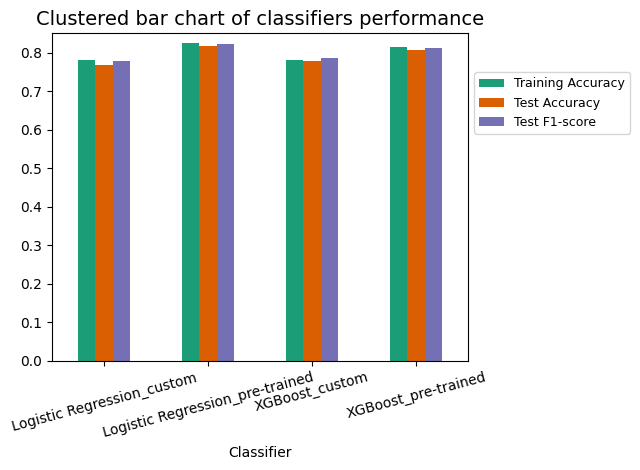

In [ ]:
# Define a color palette (tab10, Accent etc)
colors = plt.cm.Dark2.colors

# Clustered bar plot
ax = performance.iloc[:,:4].plot(x='Classifier',
        kind='bar',
        color=colors[:3],
        stacked=False)
plt.ylim(0,0.85)
plt.title('Clustered bar chart of classifiers performance', fontsize=14)
plt.xticks(rotation=15)
plt.legend(fontsize=9, loc="upper left", bbox_to_anchor=(1, 0.9)) # Adjust legend outside the axis
plt.tight_layout()
plt.show()

### 5.2.2 ROC Curves, AUC comparison

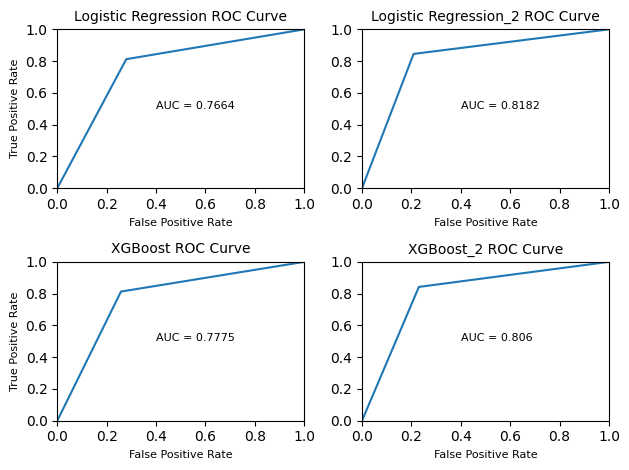

In [ ]:
# Initialize a figure
figure, axis = plt.subplots(2, 2)

# Logistic 1 ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
axis[0, 0].plot(fpr, tpr)
axis[0, 0].text(0.4, 0.5,"AUC = " + str(round(logreg_test_auc,4)),fontsize=8)
axis[0, 0].set_xlim(left=0, right=1)
axis[0, 0].set_ylim(bottom=0, top=1)
axis[0, 0].set_title("Logistic Regression ROC Curve", fontsize=10)
axis[0, 0].set_xlabel("False Positive Rate", fontsize=8)
axis[0, 0].set_ylabel("True Positive Rate", fontsize=8)

# Logistic 2 ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
axis[0,1].plot(fpr, tpr)
axis[0, 1].text(0.4, 0.5,"AUC = " + str(round(logreg_test_auc_2,4)),fontsize=8)
axis[0,1].set_xlim(left=0, right=1)
axis[0,1].set_ylim(bottom=0, top=1)
axis[0,1].set_title("Logistic Regression_2 ROC Curve", fontsize=10)
axis[0,1].set_xlabel("False Positive Rate", fontsize=8)

# XGBoost 1 ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
axis[1,0].plot(fpr, tpr)
axis[1,0].text(0.4, 0.5,"AUC = " + str(round(xgboost_test_auc,4)),fontsize=8)
axis[1,0].set_xlim(left=0, right=1)
axis[1,0].set_ylim(bottom=0, top=1)
axis[1,0].set_title("XGBoost ROC Curve", fontsize=10)
axis[1,0].set_xlabel("False Positive Rate", fontsize=8)
axis[1,0].set_ylabel("True Positive Rate", fontsize=8)

# XGBoost 2 ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
axis[1,1].plot(fpr, tpr)
axis[1,1].text(0.4, 0.5,"AUC = " + str(round(xgboost_test_auc_2,4)),fontsize=8)
axis[1,1].set_xlim(left=0, right=1)
axis[1,1].set_ylim(bottom=0, top=1)
axis[1,1].set_title("XGBoost_2 ROC Curve", fontsize=10)
axis[1,1].set_xlabel("False Positive Rate", fontsize=8)

plt.tight_layout()
plt.show()
#plt.savefig("plot.jpg")